# Spark Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget -q https://mirrors.estointernet.in/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz -P /content/
!tar xf /content/drive/Shareddrives/DA231-2021-Aug-Public/spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

Mounted at /content/drive


# Spark Session

In [ ]:
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
spark = SparkSession.builder\
         .master("local")\
         .appName("Colab")\
         .config('spark.ui.port', '4050')\
         .getOrCreate()
spark

In [92]:
pfile = "/content/drive/MyDrive/NYC_Shared_data/Parking_Violations_Issued_-_Fiscal_Year_2022.csv"

from pyspark import SparkContext, SparkConf

sc = SparkContext.getOrCreate()
##########################
# load data from CSV
parking = spark.read.option("header",True).option("inferSchema",True).csv(pfile)

# **Q1**.How often does each violation code occur? Display the frequency of the top five violation codes.

In [ ]:
from pyspark.sql.functions import count,desc,countDistinct

#parking.select(countDistinct('Violation Code')).show()
Violation_Code_count = parking.select(parking['Violation Code'].alias('Violation_Code'))\
                              .groupBy('Violation_Code')\
                              .agg(count('Violation_Code')\
                              .alias('no_of_tickets'))\
                              .sort(desc('no_of_tickets'))

Violation_Code_count.show()                              

<Figure size 432x288 with 0 Axes>

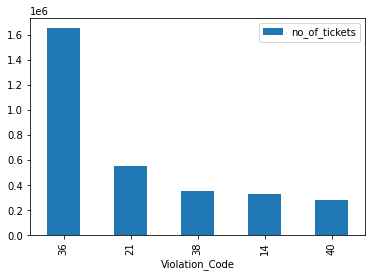

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# display top 5 Code Violation
q3_for_plot = Violation_Code_count.toPandas()
plt.clf()
q3_for_plot.head(5).plot(x='Violation_Code', y='no_of_tickets', kind='bar')
plt.show()

# **Q2**. How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'?

In [116]:
# Each vehicle body type get a parking ticket
#vehicleBodyType = spark.sql("SELECT Vehicle_Body_Type, count(*) as Ticket_Frequency from tble_view2017 group by Vehicle_Body_Type order by Ticket_Frequency desc")
vehicleBodyType  = parking.select(parking['Vehicle Body Type'].alias('Vehicle_Body_Type'))\
                              .groupBy('Vehicle_Body_Type')\
                              .agg(count('Vehicle_Body_Type')\
                              .alias('Ticket_Frequency'))\
                              .sort(desc('Ticket_Frequency'))


<Figure size 432x288 with 0 Axes>

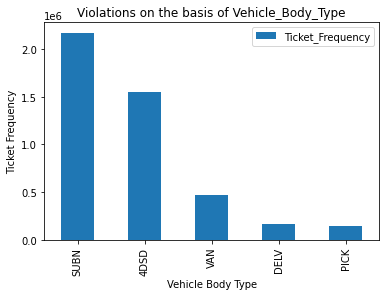

In [115]:
# plot Violations on the basis of Vehicle_Body_Type
vehicleBodyType_for_plot = vehicleBodyType.toPandas()
plt.clf()
vehicleBodyType_for_plot.head(5).plot(x='Vehicle_Body_Type', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Vehicle_Body_Type")
plt.xlabel('Vehicle Body Type')
plt.ylabel('Ticket Frequency')
plt.show()

<Figure size 432x288 with 0 Axes>

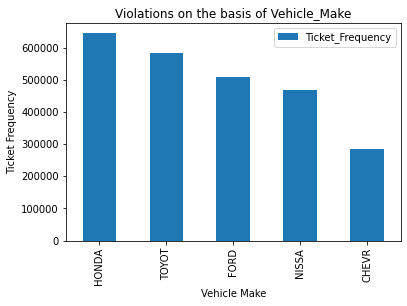

In [121]:
#vehicleMake = spark.sql("SELECT Vehicle_Make, count(*) as Ticket_Frequency from tble_view2017 group by Vehicle_Make order by Ticket_Frequency desc")
vehicleMake  = parking.select(parking['Vehicle Make'].alias('Vehicle_Make'))\
                              .groupBy('Vehicle_Make')\
                              .agg(count('Vehicle_Make')\
                              .alias('Ticket_Frequency'))\
                              .sort(desc('Ticket_Frequency'))

# plot Violations on the basis of Vehicle_Make
vehicleMake_for_plot = vehicleMake.toPandas()
plt.clf()
vehicleMake_for_plot.head(5).plot(x='Vehicle_Make', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Vehicle_Make")
plt.xlabel('Vehicle Make')
plt.ylabel('Ticket Frequency')
plt.show()